# Day 23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.size

1872

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


In [5]:
df.shape

(156, 12)

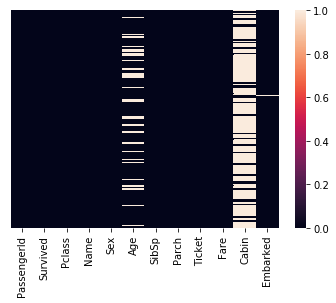

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

In [7]:
del df['Cabin']

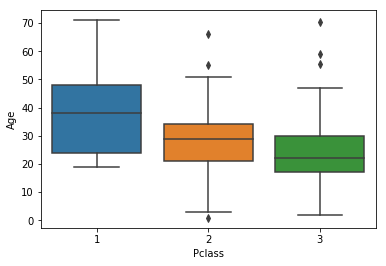

In [8]:
sns.boxplot(df['Pclass'],df['Age'])

In [9]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age
    

In [10]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

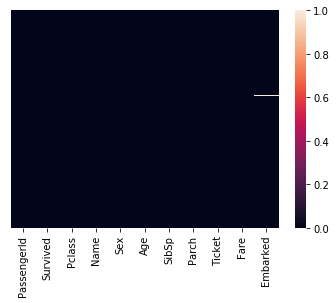

In [11]:
sns.heatmap(df.isnull(),yticklabels=False)

In [12]:
df=df.dropna()

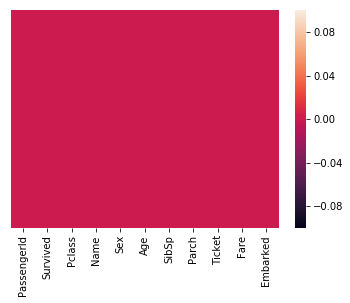

In [13]:
sns.heatmap(df.isnull(),yticklabels=False)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
del df['Name']
del df['Ticket']

In [16]:
df.Sex.replace(('male','female'),(1,0),inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [17]:
df['Embarked'].value_counts()

S    110
C     32
Q     13
Name: Embarked, dtype: int64

In [18]:
df.Embarked.replace(('S','C','Q'),(0,1,2),inplace=True)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.606452,0.341935,2.432258,0.645161,27.560194,0.619355,0.400000,27.774810,0.374194
std,45.304238,0.475896,0.789701,0.480015,13.296867,1.058491,0.872375,39.305546,0.636022
min,1.000000,0.000000,1.000000,0.000000,0.830000,0.000000,0.000000,6.750000,0.000000
25%,39.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.977100,0.000000
50%,79.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,117.500000,1.000000,3.000000,1.000000,33.500000,1.000000,0.000000,30.070800,1.000000
max,156.000000,1.000000,3.000000,1.000000,71.000000,5.000000,5.000000,263.000000,2.000000


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [23]:
rfc.fit(X_train,y_train)

/home/surekha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = rfc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        28
           1       0.78      0.37      0.50        19

    accuracy                           0.70        47
   macro avg       0.73      0.65      0.64        47
weighted avg       0.72      0.70      0.67        47



In [27]:
print(confusion_matrix(y_test,predictions))

[[26  2]
 [12  7]]


In [28]:
print(accuracy_score(y_test,predictions))

0.7021276595744681


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5


# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   scoring="accuracy")
rf.fit(X_train, y_train)

/home/surekha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surekha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surekha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surekha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/surekha/anaconda3/lib/python3.7/si

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid